In [21]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
df = pd.read_csv('diabetes_data.csv') 

# Duplicates Drop

In [23]:
print(df.duplicated().sum())
pf= df.drop_duplicates()
pf['Diabetes'].value_counts()
pf.head(4)

6672


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


In [24]:

pf['BMI']=pd.cut(x=pf['BMI'],bins=[0,18.5,24.9,29.9,34.9,100],labels=['0','1','2','3','4'])
replace_map = {'BMI':{'0':1, '1':2,'2':3,'3':4,'4':5}}
pf.replace(replace_map,inplace=True)

pf['MentHlth']=pd.cut(x=pf['MentHlth'],bins=[-1,6.0,12.0,18.0,24.0,30],labels=['0','1','2','3','4'])
replace_map = {'MentHlth':{'0':1, '1':2,'2':3,'3':4,'4':5}}
pf.replace(replace_map,inplace=True)

pf['PhysHlth']=pd.cut(x=pf['PhysHlth'],bins=[-1,6.0,12.0,18.0,24.0,30],labels=['0','1','2','3','4'])
replace_map = {'PhysHlth':{'0':1, '1':2,'2':3,'3':4,'4':5}}
pf.replace(replace_map,inplace=True)


scaler_pf= MinMaxScaler(feature_range=(0,1)).fit(pf)
pf= pd.DataFrame(scaler_pf.transform(pf[pf.columns]),columns=pf.columns)
pf.head(4)

C:\Users\joaom\AppData\Local\Temp\ipykernel_10108\2625360141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pf['BMI']=pd.cut(x=pf['BMI'],bins=[0,18.5,24.9,29.9,34.9,100],labels=['0','1','2','3','4'])
C:\Users\joaom\AppData\Local\Temp\ipykernel_10108\2625360141.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pf.replace(replace_map,inplace=True)
C:\Users\joaom\AppData\Local\Temp\ipykernel_10108\2625360141.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,0.250000,1.0,0.0,1.0,0.5,0.0,0.0,1.0,0.0,1.0,0.0,0.5,0.0,1.00,0.0,0.0,1.0,0.0
1,0.916667,1.0,1.0,1.0,0.5,1.0,0.0,0.0,1.0,0.0,0.0,0.5,0.0,0.00,0.0,1.0,1.0,0.0
2,1.000000,1.0,0.0,1.0,0.5,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0
3,0.833333,1.0,1.0,1.0,0.5,1.0,0.0,1.0,1.0,1.0,0.0,0.5,0.0,0.00,0.0,0.0,1.0,0.0


## Correlation matrix

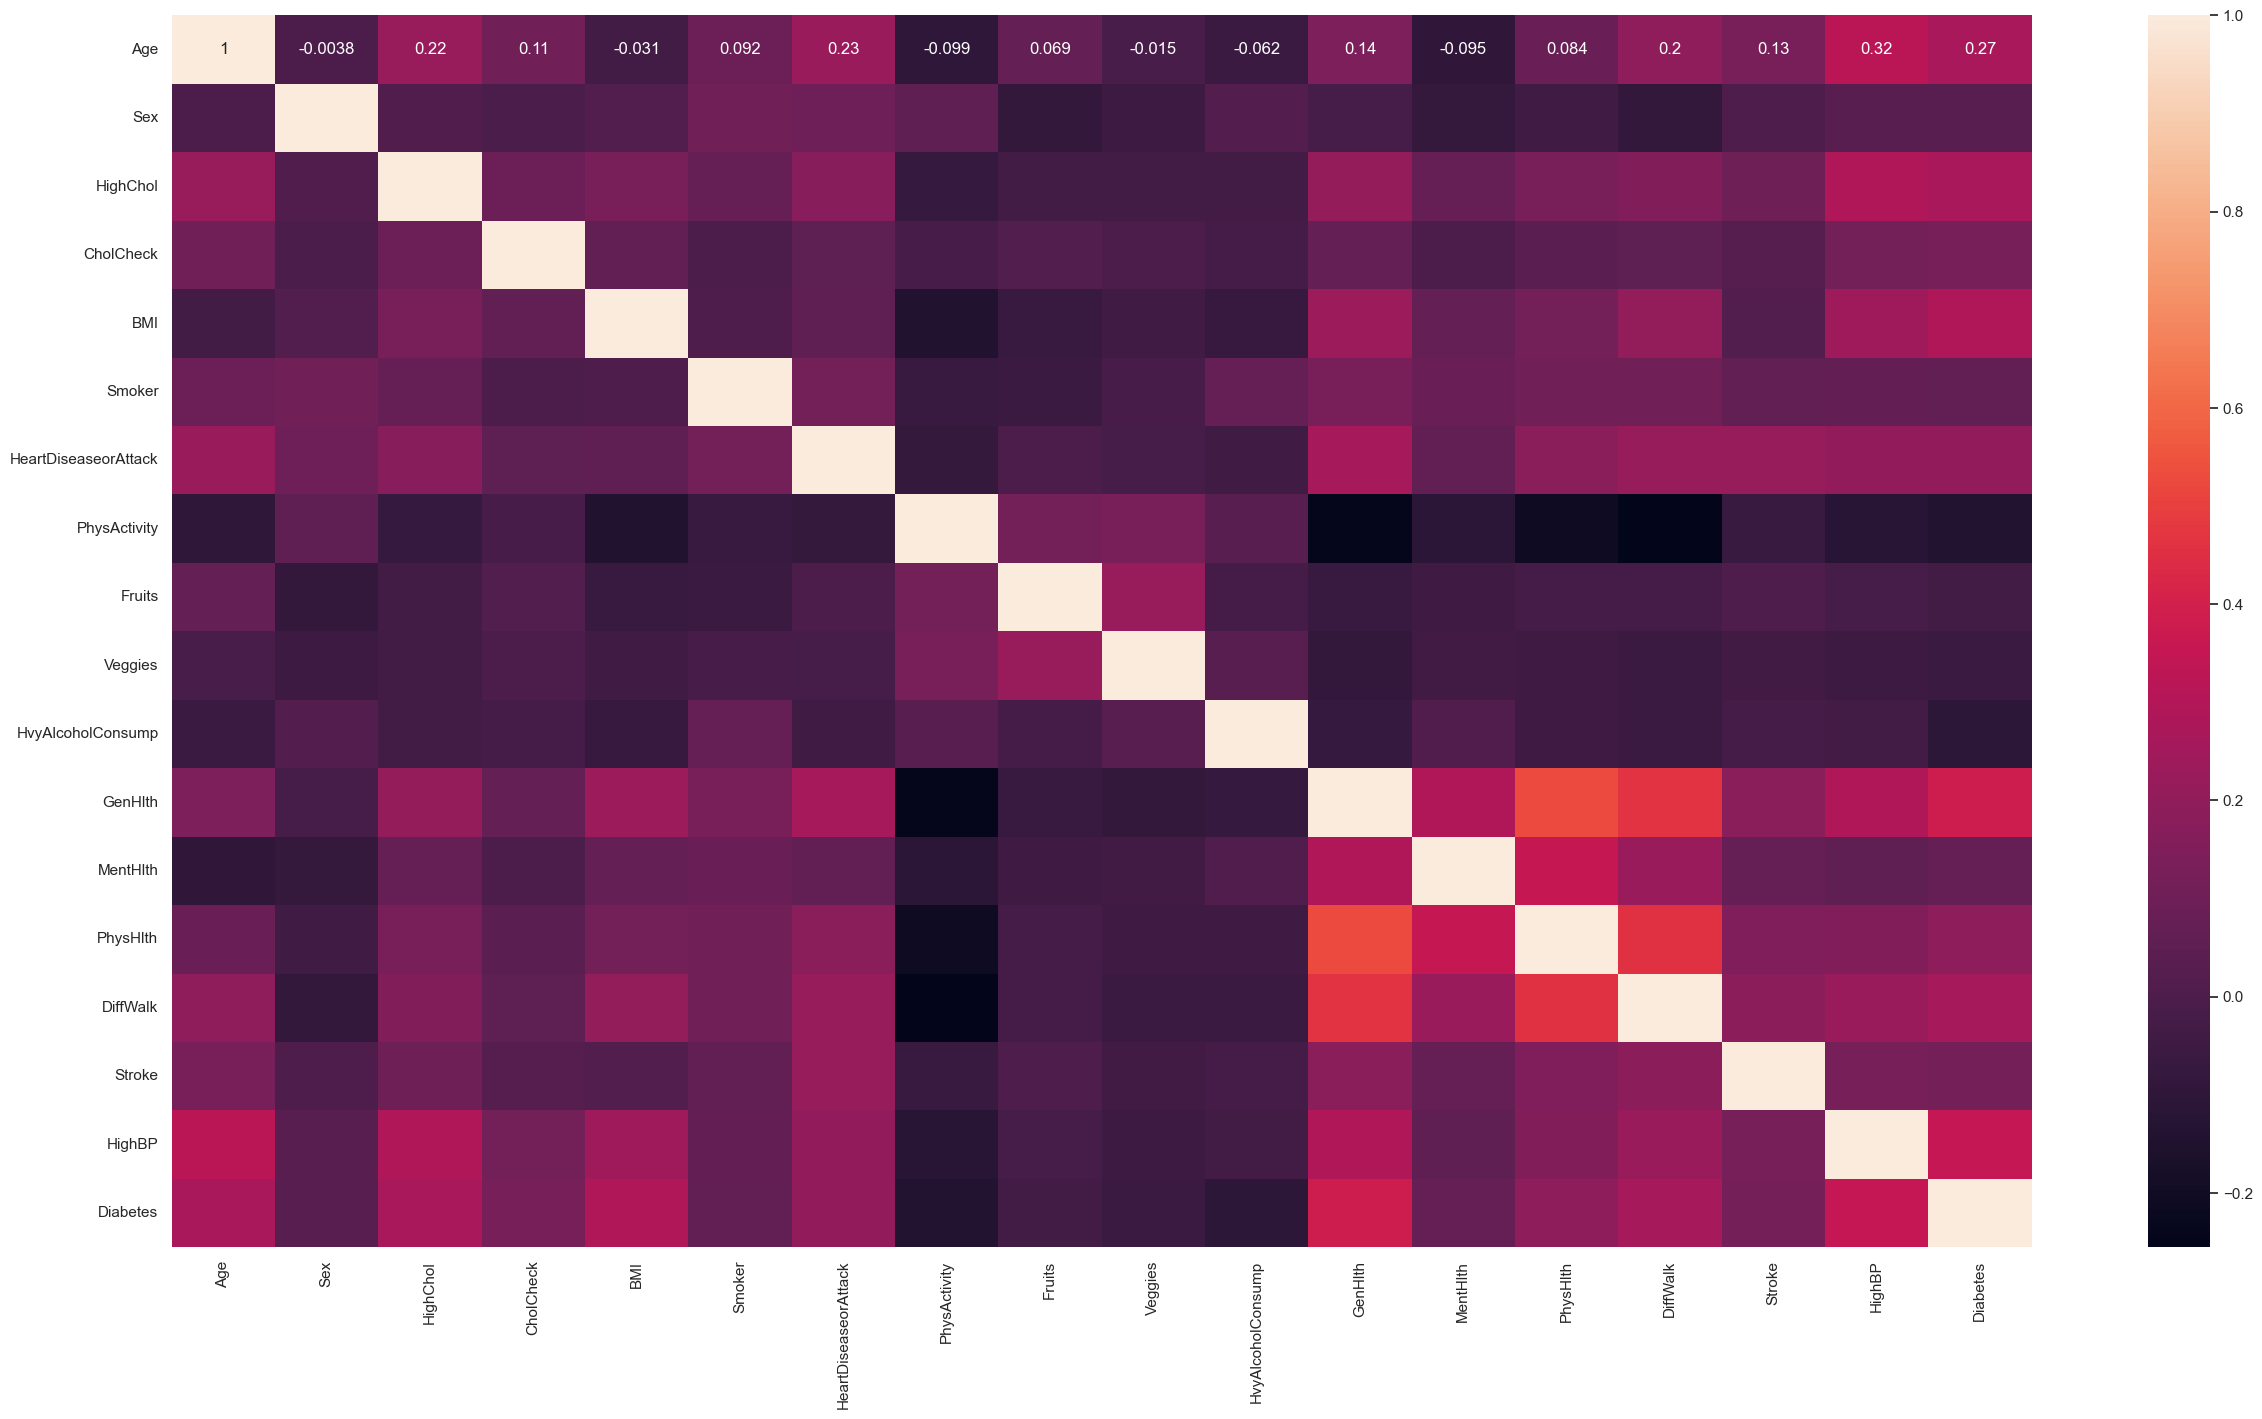

In [33]:
matrix = pf.corr()
sns.set(rc={'figure.figsize':(30,16)})
sns.heatmap(matrix,annot=True)
plt.show()



In [34]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
# Listar as correlações em ordem decrescente
correlations = matrix.unstack().sort_values(ascending=False)
print(correlations)

Age                   Age                     1.000000
Veggies               Veggies                 1.000000
CholCheck             CholCheck               1.000000
BMI                   BMI                     1.000000
Smoker                Smoker                  1.000000
HeartDiseaseorAttack  HeartDiseaseorAttack    1.000000
PhysActivity          PhysActivity            1.000000
Fruits                Fruits                  1.000000
HvyAlcoholConsump     HvyAlcoholConsump       1.000000
Sex                   Sex                     1.000000
GenHlth               GenHlth                 1.000000
MentHlth              MentHlth                1.000000
PhysHlth              PhysHlth                1.000000
DiffWalk              DiffWalk                1.000000
Stroke                Stroke                  1.000000
HighBP                HighBP                  1.000000
HighChol              HighChol                1.000000
Diabetes              Diabetes                1.000000
PhysHlth  

In [35]:
df_train,df_test = train_test_split(pf,test_size=0.3,random_state=25112002,shuffle=True)
print(df_train['Diabetes'].value_counts())
print(df_test['Diabetes'].value_counts())


Diabetes
1.0    23425
0.0    21389
Name: count, dtype: int64
Diabetes
1.0    9973
0.0    9233
Name: count, dtype: int64


## OverSampling

In [36]:
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
#cria dois dataframes diferentes de classe majoritária e minoritária
df_majority = df_train[(df['Diabetes']==1)]
df_minority = df_train[(df['Diabetes']==0)]
#upsample classe minoritária
df_minority_upsampled = resample(df_minority,
                               replace=True,
                               n_samples=25000,
                               random_state=25112002)
#combina a classe maioritáira com a classe minoritária upsampled
df_train=pd.concat([df_minority_upsampled,df_majority])
df_train
print(df_train['Diabetes'].value_counts())


Diabetes
1.0    23404
0.0    21703
Name: count, dtype: int64


C:\Users\joaom\AppData\Local\Temp\ipykernel_10108\936165569.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_majority = df_train[(df['Diabetes']==1)]
C:\Users\joaom\AppData\Local\Temp\ipykernel_10108\936165569.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_minority = df_train[(df['Diabetes']==0)]


## Datasets to csv

In [37]:


X_train=df_train.drop(['Diabetes'],axis=1)
y_train=df_train['Diabetes'].to_frame()

X_test=df_test.drop(['Diabetes'],axis=1)
y_test=df_test['Diabetes'].to_frame()


X_train.to_csv('.\X_train.csv',index=False)
y_train.to_csv('.\y_train.csv',index=False)


X_test.to_csv('.\X_test.csv',index=False)
y_test.to_csv('.\y_test.csv',index=False)
pf.to_csv('.\pf.csv',index=False)